<a href="https://colab.research.google.com/github/Sandracp27/Sandra_Cardona_Proyecto_03_ST/blob/main/Prueba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Punto 1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
from google.colab import drive 
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [17]:
import pandas as pd 

In [ ]:
column_names = ['AGENTE', 'PLANTA', 'STATE'] + ['HORA_' + str(i) for i in range(1,25)]

In [ ]:
df = pd.DataFrame(columns = column_names)

In [ ]:
with open('/content/gdrive/My Drive//OFEI1204.txt') as file:
  for i, line in enumerate(file):
    payload = line.rstrip()
    if len(payload) == 0:
      continue
    elif 'AGENTE' in payload:
      agente_name = ' '.join(payload.split()[1:])
    elif len(payload.split(',')) == 26:
      values = [l.strip() for l in payload.split(',')]
      df.loc[i] = [agente_name]+values
    else:
      print(f'Found problematic line in {i}: {payload}') 
 
df[['AGENTE', 'PLANTA', 'STATE']]

Found problematic line in 0: Ofertas Iniciales para: 2017-12-04
Found problematic line in 69: MERILECTRICA1 , CONF,  1
Found problematic line in 70: MERILECTRICA1 , C,  GAS
Found problematic line in 173: TERMOSIERRAB , CONF,  9
Found problematic line in 174: TERMOSIERRAB , C,  ACPM
Found problematic line in 176: TERMODORADA1 , CONF,  3
Found problematic line in 177: TERMODORADA1 , C,  ACPM
Found problematic line in 265: CARTAGENA1 , CONF,  1
Found problematic line in 266: CARTAGENA1 , C,  COMBUSTOLEO
Found problematic line in 268: CARTAGENA2 , CONF,  1
Found problematic line in 269: CARTAGENA2 , C,  COMBUSTOLEO
Found problematic line in 271: CARTAGENA3 , CONF,  1
Found problematic line in 272: CARTAGENA3 , C,  COMBUSTOLEO
Found problematic line in 274: ZIPAEMG2 , CONF,  1
Found problematic line in 275: ZIPAEMG2 , C,  CARBON
Found problematic line in 277: ZIPAEMG3 , CONF,  1
Found problematic line in 278: ZIPAEMG3 , C,  CARBON
Found problematic line in 280: ZIPAEMG4 , CONF,  1
Found pro

,AGENTE,PLANTA,STATE
4,AES CHIVOR,CHIVOR1,D
5,AES CHIVOR,CHIVOR2,D
6,AES CHIVOR,CHIVOR3,D
7,AES CHIVOR,CHIVOR4,D
8,AES CHIVOR,CHIVOR5,D
...,...,...,...
614,VATIA S.A.,SANTIAGO,D
615,VATIA S.A.,INCAUCA1,D
616,VATIA S.A.,INGENIOPROVIDENCIA2,D
620,ZF CELSIA,FLORES1,D


**Punto 2 MANIPULACIÓN DE DATOS**

In [3]:
df1 = pd.read_excel(io = '/content/gdrive/My Drive//Datos_Maestros_VF.xlsx')

Se utiliza la funcion loc para seleccionar las etiquetas solicitadas y todas las filas del dataset.

In [5]:
df1= df1.loc[:,["Nombre visible Agente", "AGENTE (OFEI)","CENTRAL (dDEC, dSEGDES, dPRU…)", "Tipo de central (Hidro, Termo, Filo, Menor)"]]
df1.head()

,Nombre visible Agente,AGENTE (OFEI),"CENTRAL (dDEC, dSEGDES, dPRU…)","Tipo de central (Hidro, Termo, Filo, Menor)"
0,RIO PIEDRAS,ENERGIA RIO PIEDRAS,MAGUAFRE,M
1,ALEJANDRÍA,PCH ALEJANDRÍA,M_ALEJANDRIA,M
2,EPSA,EPSA(PACIFICO),ALBAN,H
3,EPSA,EPSA(PACIFICO),ALBAN,H
4,EPSA,EPSA(PACIFICO),ALBAN,H


Luego se realiza el filtro indicado 

In [6]:
df1 = df1[((df1['AGENTE (OFEI)'] == "EMGESA") |(df1['AGENTE (OFEI)'] == "EMGESA S.A.")) & ((df1['Tipo de central (Hidro, Termo, Filo, Menor)'] == "H") |(df1['Tipo de central (Hidro, Termo, Filo, Menor)'] == "T"))]
df1.head()

,Nombre visible Agente,AGENTE (OFEI),"CENTRAL (dDEC, dSEGDES, dPRU…)","Tipo de central (Hidro, Termo, Filo, Menor)"
32,EMGESA,EMGESA S.A.,BETANIA,H
33,EMGESA,EMGESA S.A.,BETANIA,H
34,EMGESA,EMGESA S.A.,BETANIA,H
49,EMGESA,EMGESA S.A.,CTGEMG1,T
50,EMGESA,EMGESA S.A.,CTGEMG2,T


In [7]:
import numpy as np

In [8]:
df2 =pd.read_csv('/content/gdrive/My Drive//dDEC1204 .csv', encoding='latin-1', header = None)
df2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,AG_ARGOSCTG,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,AG_ARGOSYUM,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,AG_ELCAIRO,0,0,0,1,3,3,3,3,3,3,3,3,3,3,3,0,0,0,0,1,3,3,3,3
3,AG_REFICAR,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
4,AG_UNIBOL,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [9]:
df2.rename({0:"CENTRAL"}, axis=1, inplace=True)
df2.head()

,CENTRAL,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,AG_ARGOSCTG,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,AG_ARGOSYUM,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,AG_ELCAIRO,0,0,0,1,3,3,3,3,3,3,3,3,3,3,3,0,0,0,0,1,3,3,3,3
3,AG_REFICAR,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
4,AG_UNIBOL,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


Se unen los dos dataframe

In [13]:
result = pd.concat([df1,df2])
result

,Nombre visible Agente,AGENTE (OFEI),"CENTRAL (dDEC, dSEGDES, dPRU…)","Tipo de central (Hidro, Termo, Filo, Menor)",CENTRAL,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
32,EMGESA,EMGESA S.A.,BETANIA,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,EMGESA,EMGESA S.A.,BETANIA,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,EMGESA,EMGESA S.A.,BETANIA,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,EMGESA,EMGESA S.A.,CTGEMG1,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,EMGESA,EMGESA S.A.,CTGEMG2,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,NaN,NaN,NaN,NaN,ZIPAEMG2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
213,NaN,NaN,NaN,NaN,ZIPAEMG3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
214,NaN,NaN,NaN,NaN,ZIPAEMG4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
215,NaN,NaN,NaN,NaN,ZIPAEMG5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Punto 5

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score 
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#cargamos los datos

drive.mount('/content/gdrive', force_remount=True)


Mounted at /content/gdrive


In [ ]:
datos =pd.read_csv('/content/gdrive/My Drive//train.csv')
datos 

,id,FRAUDE,VALOR,HORA_AUX,Dist_max_NAL,Canal1,FECHA,COD_PAIS,CANAL,DIASEM,DIAMES,FECHA_VIN,OFICINA_VIN,SEXO,SEGMENTO,EDAD,INGRESOS,EGRESOS,NROPAISES,Dist_Sum_INTER,Dist_Mean_INTER,Dist_Max_INTER,NROCIUDADES,Dist_Mean_NAL,Dist_HOY,Dist_sum_NAL
0,9000000001,1,0.00,13,659.13,ATM_INT,20150501,US,ATM_INT,5,1,20120306.0,392.0,M,Personal Plus,29.0,1200000.0,1200000.0,1,NaN,NaN,NaN,6,474.94,4552.41,5224.36
1,9000000002,1,0.00,17,594.77,ATM_INT,20150515,US,ATM_INT,5,15,20050415.0,716.0,M,Personal Plus,29.0,5643700.0,500000.0,1,NaN,NaN,NaN,5,289.99,4552.41,2029.90
2,9000000003,1,0.00,13,659.13,ATM_INT,20150501,US,ATM_INT,5,1,20120306.0,392.0,M,Personal Plus,29.0,1200000.0,1200000.0,1,NaN,NaN,NaN,6,474.94,4552.41,5224.36
3,9000000004,1,0.00,13,659.13,ATM_INT,20150501,US,ATM_INT,5,1,20120306.0,392.0,M,Personal Plus,29.0,1200000.0,1200000.0,1,NaN,NaN,NaN,6,474.94,4552.41,5224.36
4,9000000005,1,0.00,0,1.00,ATM_INT,20150510,CR,ATM_INT,0,10,20141009.0,788.0,M,Personal,25.0,0.0,0.0,1,NaN,NaN,NaN,1,NaN,1482.35,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,622529101,1,993430.04,19,180.65,POS,20150519,US,POS,2,19,19740401.0,442.0,F,Preferencial,48.0,103918285.0,95475378.0,4,8944.83,2236.21,3646.67,4,96.86,4552.41,484.30
2961,2043206272,0,9957.05,10,318.50,POS,20150524,US,POS,0,24,19970616.0,611.0,F,Preferencial,35.0,23625000.0,5000000.0,3,27648.32,3949.76,4552.41,11,82.67,4552.41,2810.75
2962,2943206272,0,9957.05,10,318.50,POS,20150524,US,POS,0,24,19970616.0,611.0,F,Preferencial,35.0,23625000.0,5000000.0,3,27648.32,3949.76,4552.41,11,82.67,4552.41,2810.75
2963,3136302872,0,996191.64,15,234.42,POS,20150513,US,MCI,3,13,20000609.0,534.0,F,PYME,34.0,56666000.0,37600750.0,1,NaN,NaN,NaN,3,219.46,4552.41,1316.79


In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2965 non-null   int64  
 1   FRAUDE           2965 non-null   int64  
 2   VALOR            2965 non-null   float64
 3   HORA_AUX         2965 non-null   int64  
 4   Dist_max_NAL     2965 non-null   float64
 5   Canal1           2965 non-null   object 
 6   FECHA            2965 non-null   int64  
 7   COD_PAIS         2965 non-null   object 
 8   CANAL            2965 non-null   object 
 9   DIASEM           2965 non-null   int64  
 10  DIAMES           2965 non-null   int64  
 11  FECHA_VIN        2941 non-null   float64
 12  OFICINA_VIN      2941 non-null   float64
 13  SEXO             2910 non-null   object 
 14  SEGMENTO         2941 non-null   object 
 15  EDAD             2941 non-null   float64
 16  INGRESOS         2941 non-null   float64
 17  EGRESOS       

Como podemos ver en la salida, el resumen incluye una lista de todas las columnas con sus tipos de datos y el número de valores no nulos en cada columna.
Vemos que **canal1, COD_PAIS, CANAL, SEXO, SEGMENTO** tiene caracteres (string) por lo que mas adelante los vamos a tener que pasar a variables númericas

se utiliza el metodo describe para mirar algunos datos estadisticos

In [ ]:
datos.describe()

,id,FRAUDE,VALOR,HORA_AUX,Dist_max_NAL,FECHA,DIASEM,DIAMES,FECHA_VIN,OFICINA_VIN,EDAD,INGRESOS,EGRESOS,NROPAISES,Dist_Sum_INTER,Dist_Mean_INTER,Dist_Max_INTER,NROCIUDADES,Dist_Mean_NAL,Dist_HOY,Dist_sum_NAL
count,2.965000e+03,2965.000000,2.965000e+03,2965.000000,2965.000000,2.965000e+03,2965.000000,2965.000000,2.941000e+03,2941.000000,2941.000000,2.941000e+03,2.941000e+03,2965.000000,1418.000000,1418.000000,1418.000000,2965.000000,2508.000000,2965.000000,2965.000000
mean,6.890938e+09,0.246543,5.035695e+05,14.960877,314.656739,2.015051e+07,3.143002,13.492411,2.000920e+07,416.426386,40.010541,1.449104e+07,8.506309e+06,1.765936,17354.692891,4144.323540,4985.442313,3.943676,196.589282,4379.826287,1765.212887
std,9.739700e+09,0.431071,9.859497e+05,6.348607,295.142673,9.134641e+00,2.092284,9.134641,9.260427e+04,290.263484,12.976492,5.637311e+07,6.179161e+07,1.042219,25168.020649,1794.829357,2655.081718,2.750021,192.026206,1779.739070,2398.666844
min,2.364560e+06,0.000000,0.000000e+00,0.000000,1.000000,2.015050e+07,0.000000,1.000000,1.911111e+07,1.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,904.810000,904.810000,904.810000,1.000000,4.480000,0.000000,1.000000
25%,2.552997e+09,0.000000,9.016001e+04,12.000000,24.830000,2.015050e+07,1.000000,4.000000,1.995102e+07,168.000000,31.000000,2.500000e+06,5.000000e+05,1.000000,6474.200000,3178.210000,4552.410000,2.000000,60.800000,4552.410000,139.870000
50%,6.142884e+09,0.000000,2.435912e+05,16.000000,243.620000,2.015052e+07,3.000000,15.000000,2.001123e+07,360.000000,38.000000,5.800000e+06,1.800000e+06,1.000000,9104.820000,4552.410000,4552.410000,3.000000,127.700000,4552.410000,836.080000
75%,9.000000e+09,0.000000,5.058190e+05,20.000000,594.770000,2.015052e+07,5.000000,21.000000,2.008081e+07,659.000000,47.000000,1.274000e+07,4.500000e+06,2.000000,21376.445000,4552.410000,4552.410000,5.000000,269.082500,4552.410000,2533.440000
max,9.330050e+10,1.000000,2.001406e+07,23.000000,1310.460000,2.015053e+07,6.000000,31.000000,2.015043e+07,967.000000,133.000000,1.940070e+09,1.600000e+09,9.000000,758837.940000,16328.810000,17780.330000,20.000000,1217.570000,21991.200000,18832.060000


**Análisis preliminar**

In [ ]:
datos["FRAUDE"].value_counts()  # Mostrando la cantidad de fraudes 1 y transacción legítima 0 de la base de datos

0    2234
1     731
Name: FRAUDE, dtype: int64

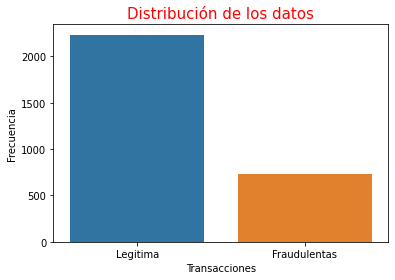

In [ ]:
sns.countplot(data = datos, x = 'FRAUDE')
plt.title("Distribución de los datos", size = 15, color='red')
plt.xticks(range(2), ['Legitima', 'Fraudulentas'])
plt.xlabel("Transacciones")
plt.ylabel("Frecuencia")
plt.show()

se puede observar que se encuentra desbalanceado

In [ ]:
print('Porcentaje de valores faltantes:')
datos.isna().mean().sort_values(ascending=False)*100

Porcentaje de valores faltantes:


Dist_Max_INTER     52.175379
Dist_Mean_INTER    52.175379
Dist_Sum_INTER     52.175379
Dist_Mean_NAL      15.413153
SEXO                1.854975
SEGMENTO            0.809444
EGRESOS             0.809444
INGRESOS            0.809444
FECHA_VIN           0.809444
OFICINA_VIN         0.809444
EDAD                0.809444
Dist_HOY            0.000000
NROCIUDADES         0.000000
NROPAISES           0.000000
id                  0.000000
FRAUDE              0.000000
DIAMES              0.000000
DIASEM              0.000000
CANAL               0.000000
COD_PAIS            0.000000
FECHA               0.000000
Canal1              0.000000
Dist_max_NAL        0.000000
HORA_AUX            0.000000
VALOR               0.000000
Dist_sum_NAL        0.000000
dtype: float64

La falta de datos es quizás el rasgo más común de los datos impuros. Estos valores suelen tomar la forma de NaN o None.

Se va a tratar los datos faltantes debido a que la mayoría de algoritmos no aceptan observaciones incompletas o bien se ven muy influenciados por ellas.

En este caso se va a estimar los valores ausentes empleando el resto de información disponible (imputación).

Se va a descartar algunas columnas que no estan aportando información relevante y que tiene casi todas sus filas  


In [ ]:
datos=datos.drop(columns=['COD_PAIS','SEXO'])

In [ ]:
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(strategy='mean')

imp_mean = imp_mean.fit(datos[['Dist_Max_INTER']])
datos[['Dist_Max_INTER']] = imp_mean.transform(datos[['Dist_Max_INTER']])
datos[['Dist_Mean_INTER']] = imp_mean.transform(datos[['Dist_Mean_INTER']])
datos[['Dist_Sum_INTER']] = imp_mean.transform(datos[['Dist_Sum_INTER']])
datos[['Dist_Mean_NAL']] = imp_mean.transform(datos[['Dist_Mean_NAL']])

Para el resto se va a  eliminar  las observaciones debido a que el porcentaje de datos ausentes es muy bajo. 

In [ ]:
datos= datos.dropna()

Luego chequeamos que no queden nulos

In [ ]:
datos.isna().mean().sort_values(ascending=False)*100

id                 0.0
FRAUDE             0.0
Dist_HOY           0.0
Dist_Mean_NAL      0.0
NROCIUDADES        0.0
Dist_Max_INTER     0.0
Dist_Mean_INTER    0.0
Dist_Sum_INTER     0.0
NROPAISES          0.0
EGRESOS            0.0
INGRESOS           0.0
EDAD               0.0
SEGMENTO           0.0
OFICINA_VIN        0.0
FECHA_VIN          0.0
DIAMES             0.0
DIASEM             0.0
CANAL              0.0
FECHA              0.0
Canal1             0.0
Dist_max_NAL       0.0
HORA_AUX           0.0
VALOR              0.0
Dist_sum_NAL       0.0
dtype: float64

Se va a mirar cuales son las variables que mas se correlacionan con la variable a predecir Fraude.

In [ ]:
#num = datos.select_dtypes(exclude='object')
num = datos.select_dtypes(exclude='object')
num_corr = num.corr()
num_corr = num_corr['FRAUDE'].sort_values(ascending=False).head(10).to_frame()
num_corr

,FRAUDE
FRAUDE,1.000000
FECHA_VIN,0.157848
DIASEM,0.130269
Dist_Mean_NAL,0.100263
VALOR,0.095247
Dist_max_NAL,0.056648
id,0.031681
FECHA,0.019166
DIAMES,0.019166
Dist_Mean_INTER,0.012786


como vimos al principio hay variables que estan en formato string hay que pasarlas a numerica mediante la función dummies porque Machine Learning solo utiliza valores numéricos, tipo de datos flotantes o enteros. Sin embargo, el dataset contiene variables categoricas de tipo nominal 

In [ ]:
datos = pd.get_dummies(datos, columns=['Canal1','SEGMENTO','CANAL'])
datos.head()

,id,FRAUDE,VALOR,HORA_AUX,Dist_max_NAL,FECHA,DIASEM,DIAMES,FECHA_VIN,OFICINA_VIN,EDAD,INGRESOS,EGRESOS,NROPAISES,Dist_Sum_INTER,Dist_Mean_INTER,Dist_Max_INTER,NROCIUDADES,Dist_Mean_NAL,Dist_HOY,Dist_sum_NAL,Canal1_ATM_INT,Canal1_POS,SEGMENTO_Emprendedor,SEGMENTO_Empresarial,SEGMENTO_PYME,SEGMENTO_Personal,SEGMENTO_Personal Plus,SEGMENTO_Preferencial,CANAL_ATM_INT,CANAL_MCI,CANAL_POS
0,9000000001,1,0.0,13,659.13,20150501,5,1,20120306.0,392.0,29.0,1200000.0,1200000.0,1,4985.442313,4985.442313,4985.442313,6,474.940000,4552.41,5224.36,1,0,0,0,0,0,1,0,1,0,0
1,9000000002,1,0.0,17,594.77,20150515,5,15,20050415.0,716.0,29.0,5643700.0,500000.0,1,4985.442313,4985.442313,4985.442313,5,289.990000,4552.41,2029.90,1,0,0,0,0,0,1,0,1,0,0
2,9000000003,1,0.0,13,659.13,20150501,5,1,20120306.0,392.0,29.0,1200000.0,1200000.0,1,4985.442313,4985.442313,4985.442313,6,474.940000,4552.41,5224.36,1,0,0,0,0,0,1,0,1,0,0
3,9000000004,1,0.0,13,659.13,20150501,5,1,20120306.0,392.0,29.0,1200000.0,1200000.0,1,4985.442313,4985.442313,4985.442313,6,474.940000,4552.41,5224.36,1,0,0,0,0,0,1,0,1,0,0
4,9000000005,1,0.0,0,1.00,20150510,0,10,20141009.0,788.0,25.0,0.0,0.0,1,4985.442313,4985.442313,4985.442313,1,4985.442313,1482.35,1.00,1,0,0,0,0,1,0,0,1,0,0


In [ ]:
y = datos[['FRAUDE']]
datos = datos.drop(['FRAUDE'], axis = 1)
X = datos.iloc[:]

Se seapara los datos de "train" en entrenamiento (70%) y un conjunto de test prueba (30%). Como mi variable target esta desbalanceado y se me va a sobreajustar el modelo lo que tengo que hacer es estratificar.

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.30, random_state=42, stratify=y)

Vamos a probar un modelo de árbol de decisión, que suele ser muy bueno en problemas de clasificación y no es tan susceptible al overfit como lo sería la regresión logística en estas condicionces.

In [ ]:
treeClassifier = DecisionTreeClassifier()
treeClassifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
treeScore = treeClassifier.score(X_test, y_test)
treePredict = treeClassifier.predict(X_test)

In [ ]:
y_train_pred = treeClassifier.predict(X_train)
y_test_pred = treeClassifier.predict(X_test)

In [ ]:
print('La precisión del modelo es de', treeScore)

La precisión del modelo es de 0.9218573046432617


In [ ]:
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print('Porcentaje de aceirtos sobre el set de entrenamiento:', train_acc)
print('Porcentaje de aceirtos sobre el set de evaluación:',test_acc)

Porcentaje de aceirtos sobre el set de entrenamiento: 1.0
Porcentaje de aceirtos sobre el set de evaluación: 0.9218573046432617


In [ ]:
test =pd.read_csv('/content/gdrive/My Drive//test.csv')
test 

,id,FRAUDE,VALOR,HORA_AUX,Dist_max_COL,Dist_max_INTER,Canal1,FECHA_FRAUDE,COD_PAIS,CANAL,FECHA,DIASEM,DIAMES,FECHA_VIN,OFICINA_VIN,SEXO,SEGMENTO,EDAD,INGRESOS,EGRESOS,NROPAISES,Dist_Sum_INTER,Dist_Mean_INTER,Dist_Max_INTER,NROCIUDADES,Dist_Sum_NAL,Dist_Mean_NAL,Dist_HOY,Dist_sum_NAL,Dist_mean_NAL,Dist_sum_INTER,Dist_mean_INTER
0,98523068,NaN,42230.09,18,1.00,1.00,POS,20150515,US,POS,20150515,5,15,20150316,611,F,Personal Plus,46,20000000,10000000,1,NaN,NaN,NaN,1,NaN,NaN,4552.41,1.00,1.00,1.00,1.00
1,300237898,NaN,143202.65,20,614.04,7632.97,POS,20150506,US,MCI,20150506,3,6,19890814,961,F,Preferencial,56,11000000,4500000,3,24370.75,6092.69,7632.97,2,1228.07,614.04,4552.41,1228.07,614.04,24370.75,6092.69
2,943273308,NaN,243591.25,2,286.84,2443.14,ATM_INT,20150517,EC,ATM_INT,20150517,0,17,20051201,218,F,Personal Plus,33,9000000,4000000,3,6974.09,1743.52,2443.14,7,1944.35,138.88,5083.41,1944.35,138.88,6974.09,1743.52
3,951645809,NaN,238267.40,20,1.00,1.00,ATM_INT,20150508,EC,ATM_INT,20150508,5,8,19990301,113,F,Personal Plus,53,2300000,500000,1,NaN,NaN,NaN,1,NaN,NaN,904.81,1.00,1.00,1.00,1.00
4,963797516,NaN,490403.58,13,1.00,1.00,ATM_INT,20150501,US,ATM_INT,20150501,5,1,19910330,85,M,Personal,0,0,0,1,NaN,NaN,NaN,1,NaN,NaN,4552.41,1.00,1.00,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,9970518152,NaN,531534.03,13,340.09,1.00,POS,20150501,US,POS,20150501,5,1,19890103,929,M,Preferencial,51,19327667,3000000,1,NaN,NaN,NaN,4,844.35,56.29,4552.41,844.35,56.29,1.00,1.00
96,9971748725,NaN,52035.08,11,28.59,4552.41,POS,20150503,AW,POS,20150503,0,3,19950601,527,M,Preferencial,40,35500000,2000000,2,9104.82,4552.41,4552.41,3,151.52,25.25,971.23,151.52,25.25,9104.82,4552.41
97,9979565282,NaN,18309.04,23,61.45,1.00,POS,20150515,US,POS,20150515,5,15,20150224,178,M,Personal Plus,43,3100000,2000000,1,NaN,NaN,NaN,2,122.90,61.45,4552.41,122.90,61.45,1.00,1.00
98,9979718478,NaN,496906.75,20,733.11,1.00,ATM_INT,20150516,US,ATM_INT,20150516,6,16,20090521,156,M,Personal Plus,40,24000000,10500000,1,NaN,NaN,NaN,3,1812.93,453.23,4552.41,1812.93,453.23,1.00,1.00


Luego se va a realizar el grafico de arbol de decisión para poder interpretar mejor lo que esta sucediendo

In [ ]:
from IPython.display import Image  
from sklearn.tree import export_graphviz
from six import StringIO
import pydotplus

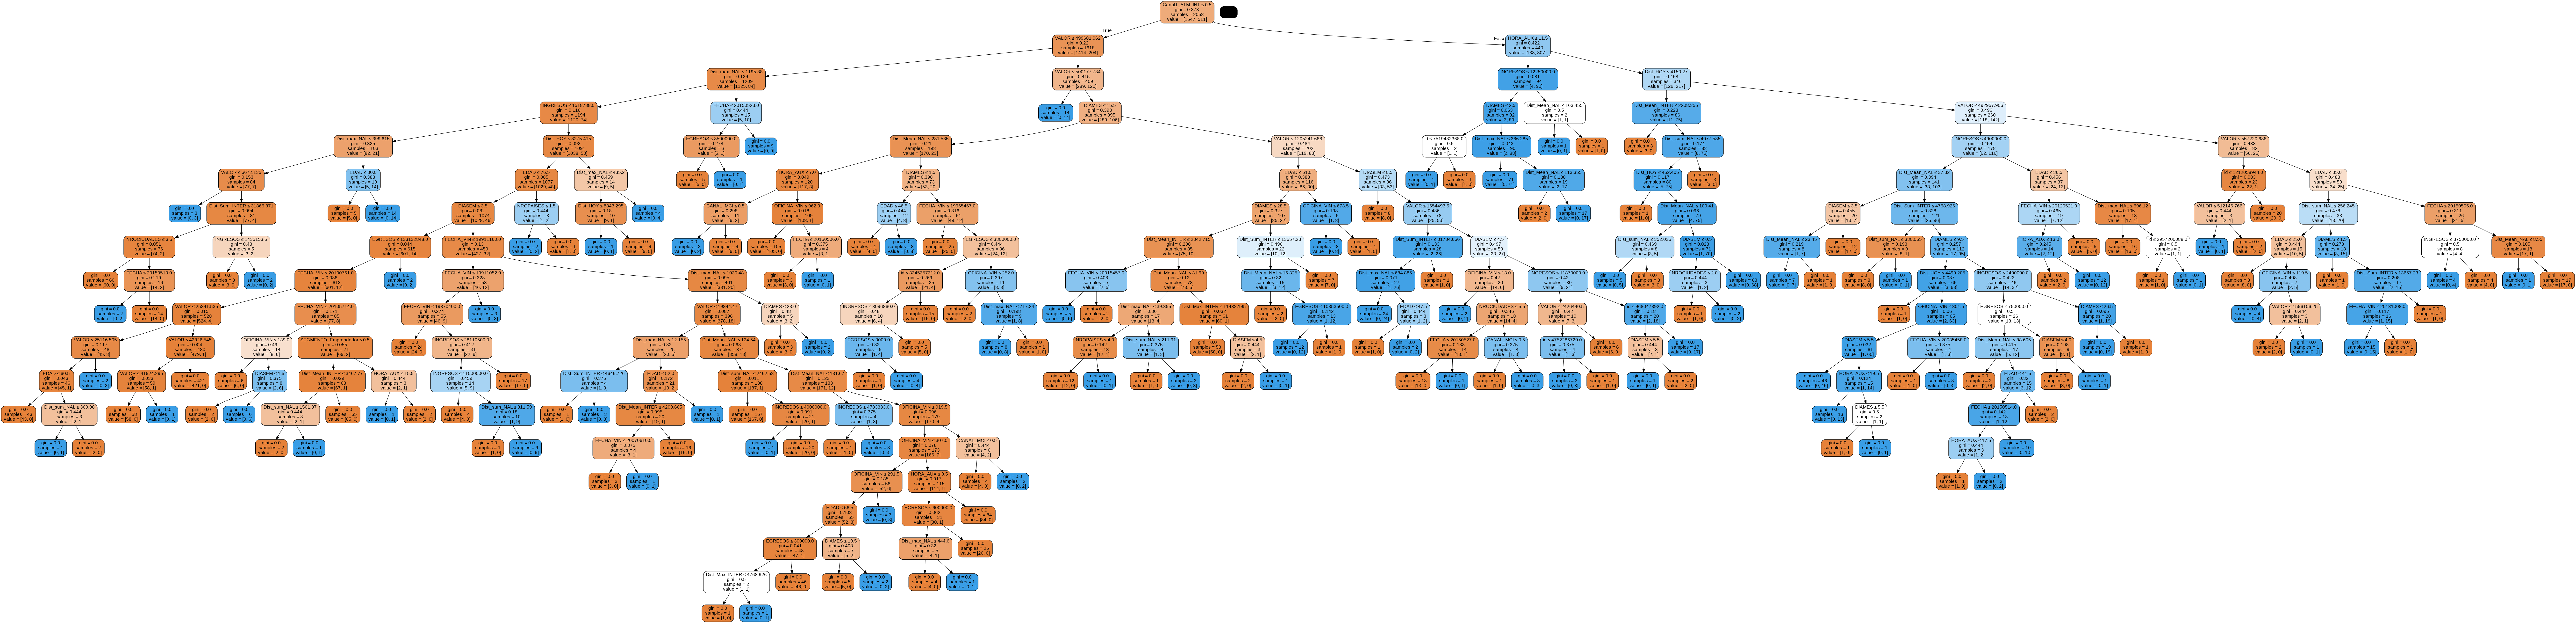

In [ ]:
dot_data = StringIO()
export_graphviz(treeClassifier, feature_names=X.columns, out_file = dot_data,  
                filled = True, rounded = True,
                special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())